<a href="https://colab.research.google.com/github/Gabriel-kopke-jr/dio-data-analisys/blob/main/Projeto_Dio_Analise_dados_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando o dataset **Product Sales - Detail 2023** e as libs utilizadas

In [19]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns

In [102]:
def take_name_products(code_product:int,df)-> str:
  return list(df.query(f'cdProduto == {code_product}')['nomeProduto'])[0]

# Processo de leitura do arquivo

## Importando o dataset

In [4]:
sales = pd.read_excel('DetailSales.xlsx')

In [5]:
sales.head()

,id,Orden ID,Producto,Nombre,Cantidad,Precio,Total,Vendedor,Fecha,Usuario,Creado,Impuesto
0,3b1c962d,e72de456,50,COLOR RAIZ X50G,3,700,2100,9f04044e,2021-01-08 00:00:00,ADMIN,2021-12-06 06:41:00,1.19
1,037b90c1,52ad5614,50,COLOR RAIZ X50G,4,700,2800,9f04044e,2021-01-10 00:00:00,ADMIN,2021-12-06 08:11:00,1.19
2,7addf8af,d1c1e8db,50,COLOR RAIZ X50G,6,700,4200,9f04044e,2021-02-08 00:00:00,ADMIN,2021-12-06 08:56:00,1.19
3,7c6dc67f,c7b6cf8c,50,COLOR RAIZ X50G,12,700,8400,9f04044e,2021-02-08 00:00:00,ADMIN,2021-12-06 08:59:00,1.19
4,69b6d156,1a248fee,50,COLOR RAIZ X50G,6,700,4200,c5abb107,2021-02-10 00:00:00,ADMIN,2021-12-06 09:35:00,1.19


## Alterando traduzindo as colunas do dataframe

In [6]:
dict_translate_columns = {'id':'id',
    'Orden ID':'id_ordem',
    'Producto':'cdProduto',
    'Nombre':'nomeProduto',
    'Cantidad':'quantidade',
    'Precio':'precoUnitario',
    'Total':'precoTotal',
    'Vendedor':'vendedor',
    'Fecha':'dtCriacao',
    'Usuario':'usuario',
    'Creado':'dtInicioEntrega',
    'Impuesto':'imposto'}

In [7]:
sales.rename(columns=dict_translate_columns,inplace = True)

## Remoção das colunas usuario e imposto que não farão parte da análise

In [8]:
sales.drop(columns= ['usuario','imposto'],inplace = True)

# Processo de limpeza de dados

In [9]:
valores_null = [{column: sales[column].isnull().sum()}for column in sales.columns if sales[column].isnull().sum() != 0]
valores_na = [{column: sales[column].isna().sum()}for column in sales.columns if sales[column].isna().sum() != 0]

In [10]:
valores_null

[]

In [11]:
valores_na

[]

Percebe-se que não existem valores do tipo Null e do tipo NaN em nenhuma das colunas

## Unificando as datas para o formato datetime

In [12]:
sales

,id,id_ordem,cdProduto,nomeProduto,quantidade,precoUnitario,precoTotal,vendedor,dtCriacao,dtInicioEntrega
0,3b1c962d,e72de456,50,COLOR RAIZ X50G,3,700,2100,9f04044e,2021-01-08 00:00:00,2021-12-06 06:41:00
1,037b90c1,52ad5614,50,COLOR RAIZ X50G,4,700,2800,9f04044e,2021-01-10 00:00:00,2021-12-06 08:11:00
2,7addf8af,d1c1e8db,50,COLOR RAIZ X50G,6,700,4200,9f04044e,2021-02-08 00:00:00,2021-12-06 08:56:00
3,7c6dc67f,c7b6cf8c,50,COLOR RAIZ X50G,12,700,8400,9f04044e,2021-02-08 00:00:00,2021-12-06 08:59:00
4,69b6d156,1a248fee,50,COLOR RAIZ X50G,6,700,4200,c5abb107,2021-02-10 00:00:00,2021-12-06 09:35:00
...,...,...,...,...,...,...,...,...,...,...
25153,93d37329,afbe1372,241,MANI TRITURADO X100g,4,1700,6800,9f04044e,2023-01-31 00:00:00,2023-01-31 19:03:32
25154,9115e6ca,5a0b9141,241,MANI TRITURADO X100g,4,1700,6800,9f04044e,2023-02-14 00:00:00,2023-02-14 16:29:30
25155,fda22a91,b79e3a87,242,POLVO DE HORNEAR X 500 G,4,7000,28000,9f04044e,2023-02-06 00:00:00,2023-02-07 18:36:18
25156,59091ce9,84e01d43,243,ANIS COMUN X20G,6,1200,7200,c5abb107,2023-03-02 00:00:00,2023-03-03 01:22:23


In [13]:
def change_values_data(lista:list)-> list:
  aux = []
  for element in lista:
    if type(element) == type(str('a')):
      data_datetime = datetime(int(element.split('/')[2]),int(element.split('/')[1]),int(element.split('/')[0]))
      aux.append(data_datetime)
    else:  
      aux.append(element)
  return aux

In [14]:
sales['dtCriacao'] = change_values_data(sales['dtCriacao'])
sales['dtInicioEntrega'] = change_values_data(sales['dtInicioEntrega'])

In [15]:
sales

,id,id_ordem,cdProduto,nomeProduto,quantidade,precoUnitario,precoTotal,vendedor,dtCriacao,dtInicioEntrega
0,3b1c962d,e72de456,50,COLOR RAIZ X50G,3,700,2100,9f04044e,2021-01-08,2021-12-06 06:41:00
1,037b90c1,52ad5614,50,COLOR RAIZ X50G,4,700,2800,9f04044e,2021-01-10,2021-12-06 08:11:00
2,7addf8af,d1c1e8db,50,COLOR RAIZ X50G,6,700,4200,9f04044e,2021-02-08,2021-12-06 08:56:00
3,7c6dc67f,c7b6cf8c,50,COLOR RAIZ X50G,12,700,8400,9f04044e,2021-02-08,2021-12-06 08:59:00
4,69b6d156,1a248fee,50,COLOR RAIZ X50G,6,700,4200,c5abb107,2021-02-10,2021-12-06 09:35:00
...,...,...,...,...,...,...,...,...,...,...
25153,93d37329,afbe1372,241,MANI TRITURADO X100g,4,1700,6800,9f04044e,2023-01-31,2023-01-31 19:03:32
25154,9115e6ca,5a0b9141,241,MANI TRITURADO X100g,4,1700,6800,9f04044e,2023-02-14,2023-02-14 16:29:30
25155,fda22a91,b79e3a87,242,POLVO DE HORNEAR X 500 G,4,7000,28000,9f04044e,2023-02-06,2023-02-07 18:36:18
25156,59091ce9,84e01d43,243,ANIS COMUN X20G,6,1200,7200,c5abb107,2023-03-02,2023-03-03 01:22:23


# Análise dos dados tratados

## Análise por produto

In [71]:
produtos  =sales.groupby(by = 'cdProduto')[['quantidade']].sum()
top5 = produtos.sort_values(by='quantidade', ascending = False).head()
top5.reset_index(inplace=True)

In [46]:
df = produtos.reset_index(inplace=True)

<Axes: xlabel='cdProduto', ylabel='quantidade'>

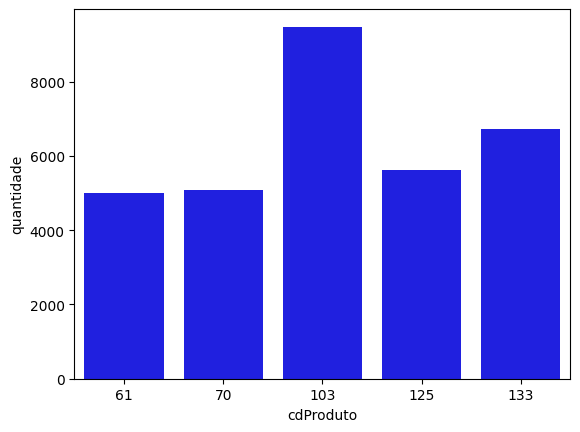

In [76]:
sns.barplot(x = 'cdProduto', y = 'quantidade',data =top5,color='blue')

Nota-se que os top 5 produtos mais vendidos são os de código 61 , 70, 103 , 125 e 133. Verificaremos agora quais são esses produtos

In [112]:
cdProdutos = list(top5['cdProduto'])
names = [take_name_products(code,sales) for code in cdProdutos]
produtos_mais_vendidos = pd.DataFrame({'cdProduto':cdProdutos,'nomeProduto':names})
produtos_mais_vendidos

,cdProduto,nomeProduto
0,103,CANELA ASTILLA X5G
1,133,AJO MOLIDO X 40 G
2,125,ADOBO 7 HIERBAS X60G
3,70,CLAVO ENTERO X5G
4,61,UVAS PASAS X40G


Nota-se que os itens mais vendidos são especiarias ou temperos.

## Análise por vendedor

In [121]:
vendedor = pd.DataFrame(sales.groupby(by = 'vendedor')['precoTotal'].sum())
vendedor.reset_index(inplace=True)
vendedor

,vendedor,precoTotal
0,490dc6e8,4755290
1,53de5b54,5447290
2,9f04044e,36159280
3,c5abb107,108653850


In [130]:
total_vendas = vendedor['precoTotal'].sum()

In [131]:
vendedor['percentualVendas'] = (vendedor['precoTotal']/total_vendas*100)

<Axes: xlabel='vendedor', ylabel='percentualVendas'>

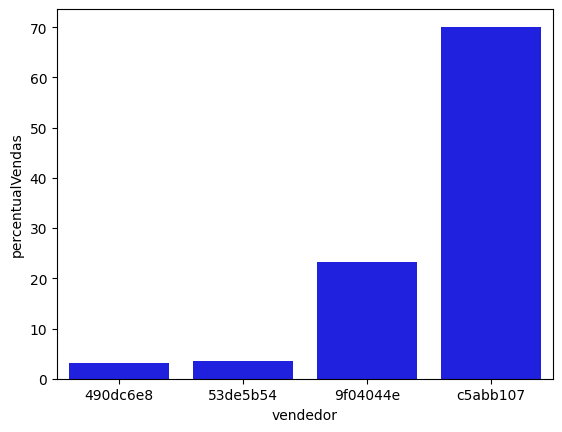

In [132]:
sns.barplot(x = 'vendedor', y = 'percentualVendas',data =vendedor,color='blue')

Nota-se que existe uma grande disparidade entre os vendedores, onde 1 vendedor concentra algo em torno de 70% das vendas. 